# Titanic Data Evaluation

Load modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

## About Dataset

The data set we going to use is a built in dataset from seaborn contains data on individuals who boarded the titanic
The data set contains the following feartures:
1. survived      -> survival: 0 = No, 1 = Yes
2. pclass        -> ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
3. sex           -> sex
4. age           -> age in years
5. sibsp         -> # of siblings / spouses aboard the Titanic
6. parch         -> # of parents / children aboard the Titanic
7. fare          -> passenger fare
8. embarked      -> port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton
9. class         -> ticket class
10. who          -> man, woman or child.
11. adult_male   -> adult: True or False 
12. deck         -> cabin number
13. embark_town  -> town of embarkation
14. alive        -> survived: yes or no 
15. alone        -> was the passenger alone: True or False

Load dataset

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Data Visualization

Visual representation on the count of who boarded the titanic

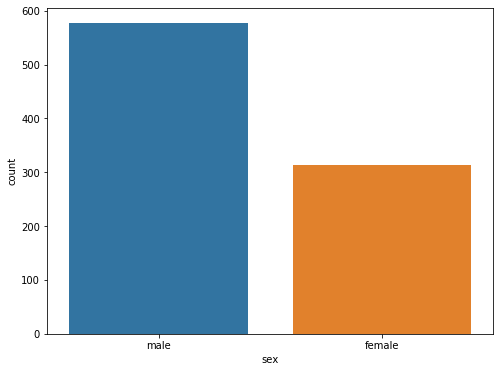

In [3]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex',data=df)
plt.show()

In [4]:
# create a new dataframe of rows where survived is 0 i.e died
died = df.loc[df['survived'] == 0, ['survived','sex']]
died.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   survived  549 non-null    int64 
 1   sex       549 non-null    object
dtypes: int64(1), object(1)
memory usage: 12.9+ KB


In [5]:
died.sex.value_counts()

male      468
female     81
Name: sex, dtype: int64

Visual representation on the count of gender that died on the titanic

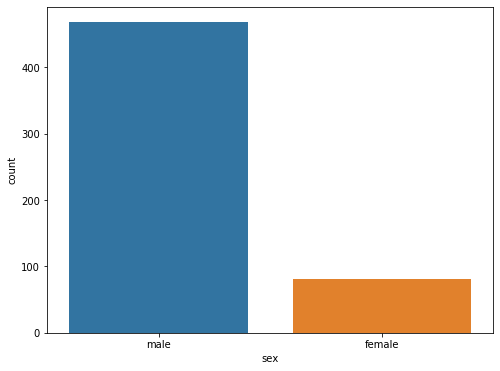

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex',data=died)
plt.show()

From the information above the analysis shows that out of __891__ People on board __549__ died, __468__ males and __81__ females.

In [7]:
# create a new dataframe of rows where survived is 1 i.e lived
lived = df.loc[df['survived'] == 1, ['survived','sex']]
lived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   survived  342 non-null    int64 
 1   sex       342 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.0+ KB


In [8]:
lived.sex.value_counts()

female    233
male      109
Name: sex, dtype: int64

Visual representation on the count of gender that survived on the titanic

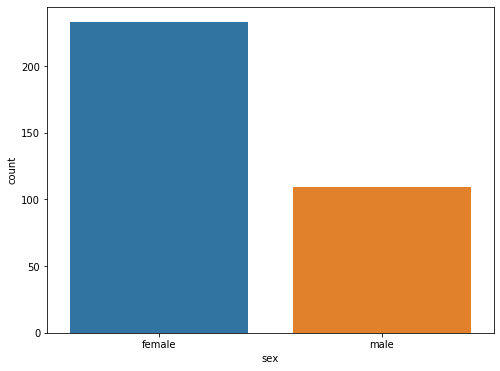

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex',data=lived)
plt.show()

From the information above it shows that out of __891__ People on board __342__ survived, __109__ males and __233__ females.

## Data Cleaning

In [10]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


From information above;
1. We know there are 891 observations and 15 attributes to deal with
2. The __age__, __embarked__, __deck__ and __embarked town__ all have missing values
3. But in our analysis/model evaluation we would need only the __survived__, __pclass__, __sex__, __age__, __embarked__, __who__,
   __adult male__, and __alone__ attributes, so we can tag the rest as bad predictors and drop them.
4. if there exist further missing values we replace those missing values.

Drop unwanted columns

In [12]:
df.drop(['sibsp','parch','fare','class','deck','embark_town','alive'],axis=1,inplace=True)
df

,survived,pclass,sex,age,embarked,who,adult_male,alone
0,0,3,male,22.0,S,man,True,False
1,1,1,female,38.0,C,woman,False,False
2,1,3,female,26.0,S,woman,False,True
3,1,1,female,35.0,S,woman,False,False
4,0,3,male,35.0,S,man,True,True
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,S,man,True,True
887,1,1,female,19.0,S,woman,False,True
888,0,3,female,NaN,S,woman,False,False
889,1,1,male,26.0,C,man,True,True


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         714 non-null    float64
 4   embarked    889 non-null    object 
 5   who         891 non-null    object 
 6   adult_male  891 non-null    bool   
 7   alone       891 non-null    bool   
dtypes: bool(2), float64(1), int64(2), object(3)
memory usage: 43.6+ KB


Age and Embarked have missing values, let's handle that.

In [14]:
# For our age column we replace with the mean
df['age'].replace(np.nan,df['age'].mean(),inplace=True)

In [15]:
# For our embarked column we replace with mode
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [16]:
df['embarked'].fillna('S',inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   embarked    891 non-null    object 
 5   who         891 non-null    object 
 6   adult_male  891 non-null    bool   
 7   alone       891 non-null    bool   
dtypes: bool(2), float64(1), int64(2), object(3)
memory usage: 43.6+ KB


In [18]:
df.head()

,survived,pclass,sex,age,embarked,who,adult_male,alone
0,0,3,male,22.0,S,man,True,False
1,1,1,female,38.0,C,woman,False,False
2,1,3,female,26.0,S,woman,False,True
3,1,1,female,35.0,S,woman,False,False
4,0,3,male,35.0,S,man,True,True


Now we have handled missing values, let's group the age into 6 distinct groups and visualize the age groups of deaths and survivals.

In [19]:
grouped_ages = pd.cut(df.age, 6, labels=['0-13','14-26','27-40','41-53','54-66','67-80'])
df.insert(4, 'age_groups', grouped_ages)

In [20]:
df.head()

,survived,pclass,sex,age,age_groups,embarked,who,adult_male,alone
0,0,3,male,22.0,14-26,S,man,True,False
1,1,1,female,38.0,27-40,C,woman,False,False
2,1,3,female,26.0,14-26,S,woman,False,True
3,1,1,female,35.0,27-40,S,woman,False,False
4,0,3,male,35.0,27-40,S,man,True,True


[]

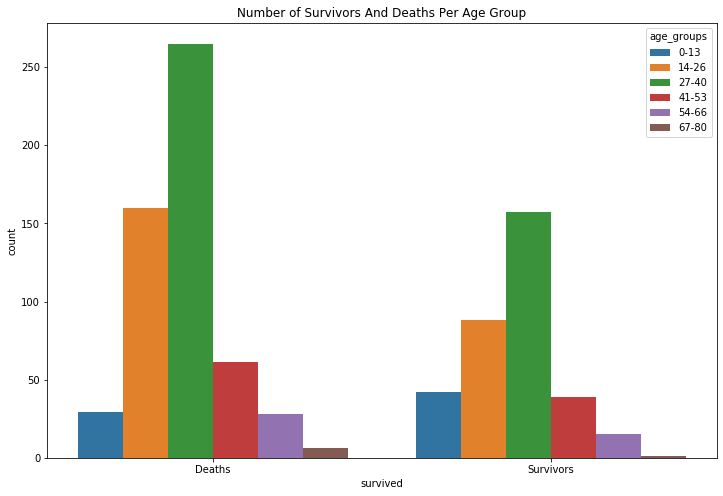

In [21]:
plt.figure(figsize=(12,8))
graph = sns.countplot(x=df.survived, hue=df.age_groups)
graph.set_title('Number of Survivors And Deaths Per Age Group', fontsize=12)
graph.set_xticklabels(['Deaths','Survivors'])
plt.plot()

### Modelling

In [22]:
df.head()

,survived,pclass,sex,age,age_groups,embarked,who,adult_male,alone
0,0,3,male,22.0,14-26,S,man,True,False
1,1,1,female,38.0,27-40,C,woman,False,False
2,1,3,female,26.0,14-26,S,woman,False,True
3,1,1,female,35.0,27-40,S,woman,False,False
4,0,3,male,35.0,27-40,S,man,True,True


From our dataframe above we have columns that are characters we have to represent them numerically so we can model.

In [23]:
# Drop age_groups columns as we no longer need it
df.drop('age_groups',axis=1,inplace=True)

In [24]:
# map labels to be replaced
sex_map = {'male':1, 'female':0}
embarked_map = {'S':2, 'C':1, 'Q':0}
who_map = {'man':2, 'woman':1, 'child':0}

In [25]:
# Replace
df.sex = df.sex.map(sex_map)
df.embarked = df.embarked.map(embarked_map)
df.who = df.who.map(who_map)

df.adult_male = df.adult_male.astype(int)
df.alone = df.alone.astype(int)

In [26]:
df.head()

,survived,pclass,sex,age,embarked,who,adult_male,alone
0,0,3,1,22.0,2,2,1,0
1,1,1,0,38.0,1,1,0,0
2,1,3,0,26.0,2,1,0,1
3,1,1,0,35.0,2,1,0,0
4,0,3,1,35.0,2,2,1,1


In [27]:
# Convert all columns to integer data type
df = df.astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   survived    891 non-null    int32
 1   pclass      891 non-null    int32
 2   sex         891 non-null    int32
 3   age         891 non-null    int32
 4   embarked    891 non-null    int32
 5   who         891 non-null    int32
 6   adult_male  891 non-null    int32
 7   alone       891 non-null    int32
dtypes: int32(8)
memory usage: 28.0 KB


## Modelling

### Feature set

In [29]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'embarked', 'who', 'adult_male',
       'alone'],
      dtype='object')

In [30]:
# Define the feature set X
X = df[['pclass','sex','age','embarked','who','adult_male','alone']].values
X[0:5]

array([[ 3,  1, 22,  2,  2,  1,  0],
       [ 1,  0, 38,  1,  1,  0,  0],
       [ 3,  0, 26,  2,  1,  0,  1],
       [ 1,  0, 35,  2,  1,  0,  0],
       [ 3,  1, 35,  2,  2,  1,  1]])

In [31]:
# Define feature set Y
y = df['survived'].values
y[0:5]

array([0, 1, 1, 1, 0])

### Normalize Data

In [32]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.82737724,  0.73769513, -0.58004441,  0.56883712,  0.74259613,
         0.81192233, -1.2316449 ],
       [-1.56610693, -1.35557354,  0.65011226, -1.00518113, -0.77148431,
        -1.2316449 , -1.2316449 ],
       [ 0.82737724, -1.35557354, -0.27250525,  0.56883712, -0.77148431,
        -1.2316449 ,  0.81192233],
       [-1.56610693, -1.35557354,  0.41945788,  0.56883712, -0.77148431,
        -1.2316449 , -1.2316449 ],
       [ 0.82737724,  0.73769513,  0.41945788,  0.56883712,  0.74259613,
         0.81192233,  0.81192233]])

### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train set: ",X_train.shape,y_train.shape)
print("Test set: ",X_test.shape,y_test.shape)

Train set:  (712, 7) (712,)
Test set:  (179, 7) (179,)


## K nearest neighbor

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Calculate the accuracy of KNN with different Ks

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for i in range(1, Ks):
    # Train model
    n = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    # Predict
    yhat = n.predict(X_test)
    # Accuracy evaluation
    mean_acc[i-1] = metrics.accuracy_score(y_test,yhat)

    std_acc[i-1] = metrics.accuracy_score()
